# Assignment 1

Explore solutions of linear regression model with MSE loss.  
Investigate how regularization affects the solution.  
In this toy example we use simulated data and select $|| \hat w - w||_2$ as quality metric (distance between found solution and the ground truth).  
In the tasks 1-3 you are allowed to use only `numpy`.

In [1]:
import sklearn
print(sklearn.__version__)
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math

1.1.2


Condition number of matrix $A$ is 
$$ k(A) = \frac {\lambda_{max}(A)} {\lambda_{min}(A)}$$
where  
$\lambda_{max}$ - max eigenvalue of $A$  
$\lambda_{min}$ - min eigenvalue of $A$


In [2]:
X, y, coef = make_regression(n_samples=1000, 
                             n_features=1000, 
                             n_informative=1000, 
                             n_targets=1, 
                             bias=0.0, 
                             effective_rank=10, 
                             tail_strength=0.5, 
                             noise=0.1, 
                             shuffle=True, coef=True, random_state=42)

print('k(A)', np.linalg.cond(X.T.dot(X)))

coef = coef.reshape([1, 1000])

scaler = StandardScaler()
X = scaler.fit_transform(X)
coef = scaler.inverse_transform(coef)

k(A) 1902233129.5906744


## Task 1 (20 points)
Implement analytic solution for linear regression with MSE loss.

In [3]:
def solve1(X, y):
    """
    @return: weights of the linear model
    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w

if np.linalg.norm(solve1(X, y) - coef) < 400:
    print('success!')

success!


## Task 2 (20 points)
Implement analytic solution for linear regression with MSE loss and $L_2$ regularization.  
Plot the dependence between regularization coefficient $\alpha$ and $|| \hat w - w||_2$.

In [4]:
def solve2(X, y, alpha=0.1):
    """
    @return: weights of the linear model
    """
    real_alpha = 2 * X.shape[0] * alpha
    
    new_y = y.reshape([1000, 1])
    
    w = np.linalg.inv(X.T.dot(X) + np.identity(X.shape[1]).dot(real_alpha)).dot(X.T).dot(new_y)
    return w.reshape([1, 1000])

task2_alpha = 0.1

if np.linalg.norm(solve2(X, y) - coef) < 10:
    print('success!')

success!


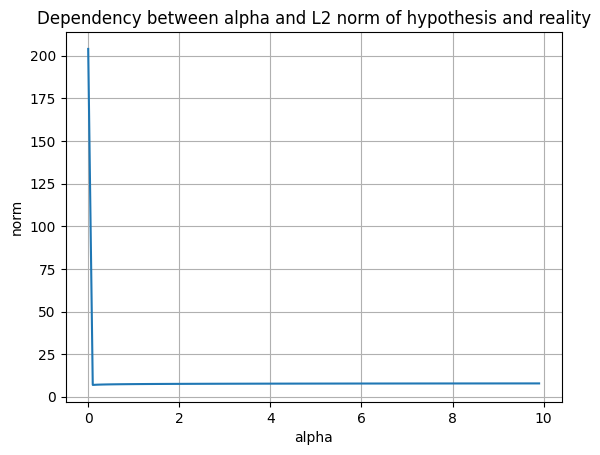

In [5]:
alphas = np.arange(0, 10, 0.1)
deltas = np.array([np.linalg.norm(solve2(X, y, alpha) - coef) for alpha in alphas])

fig, ax = plt.subplots()
ax.plot(alphas, deltas)

ax.set(xlabel='alpha', ylabel='norm',
       title='Dependency between alpha and L2 norm of hypothesis and reality')
ax.grid()

plt.show()

## Task 3 (20 points)
Implement Full Gradient Descent solution for linear MSE regression with $L_2$ regularization.  
Use gradient norm for stopping criterion.

In [6]:
def L(X, w, y, alpha):
    return (1 / len(y)) * (np.linalg.norm(y - X * w, ord=2) ** 2) + alpha * (np.linalg.norm(w, ord=2) ** 2)

def solve3(X, y, alpha=0.99, max_iter=1000, tol=0.001, learning_rate=0.005):
    """
    @param tol: value for stopping criterion
    @param max_iter: max number of iterations
    @return: weights of the linear model
    """
    XT_X = X.T.dot(X)
    XT_y = X.T.dot(y)
    
    def grad(w):
        return (2 / len(y)) * (XT_X.dot(w) - XT_y) + 2 * alpha * w
    
    np.random.seed(239)
    w = np.random.rand(len(y))
    
    for i in range(max_iter):
        current_grad = grad(w)
        w = w - current_grad * learning_rate
        if np.linalg.norm(current_grad * learning_rate) < tol or np.linalg.norm(current_grad) < tol:
            break
        
    return w

result = solve3(X, y, 0.99, 1000, 0.001)

if np.linalg.norm(result - coef) < 10:
    print('success!')

success!


## Task 4 (20 points)
What param in `make_regression` affects condition number of $X^T X$ the most? Why?    
Tweak `make_regression` routine to generate problems with different condition numbers.  
Plot the dependence between $||\hat w - w||_2$ of the analytic solution from `task 1` and condition number of $X^T X$.  
Use log scale for condition numbers in the plot.

## Task 5 (20 points)
How does switching on and off the `StandardScaler` transformation affects quality of solutions in the tasks 1-3?  
How is it connected with $L_2$ norm?

In [15]:
def with_std_scaler():
    inputs, outputs, solution = make_regression(n_samples=1000, 
                                 n_features=1000, 
                                 n_informative=1000, 
                                 n_targets=1, 
                                 bias=0.0, 
                                 effective_rank=10, 
                                 tail_strength=0.5, 
                                 noise=0.1, 
                                 shuffle=True, coef=True, random_state=42)

    solution = solution.reshape([1, 1000])

    scaler = StandardScaler()
    inputs = scaler.fit_transform(inputs)
    solution = scaler.inverse_transform(solution.reshape(1,-1))
    
    return inputs, outputs, solution

def without_std_scaler():
    inputs, outputs, solution = make_regression(n_samples=1000, 
                                 n_features=1000, 
                                 n_informative=1000, 
                                 n_targets=1, 
                                 bias=0.0, 
                                 effective_rank=10, 
                                 tail_strength=0.5, 
                                 noise=0.1, 
                                 shuffle=True, coef=True, random_state=42)

    solution = solution.reshape([1, 1000])
    
    return inputs, outputs, solution

def get_solution_metrics_with_std_scaler(ord_num=2):
    inputs, outputs, solution = with_std_scaler()
    return [
        np.linalg.norm(solve1(inputs, outputs) - solution, ord=ord_num),
        np.linalg.norm(solve2(inputs, outputs) - solution, ord=ord_num),
        np.linalg.norm(solve3(inputs, outputs) - solution, ord=ord_num)
    ]

def get_solution_metrics_without_std_scaler(ord_num=2):
    inputs, outputs, solution = without_std_scaler()
    return [
        np.linalg.norm(solve1(inputs, outputs) - solution, ord=ord_num),
        np.linalg.norm(solve2(inputs, outputs) - solution, ord=ord_num),
        np.linalg.norm(solve3(inputs, outputs) - solution, ord=ord_num)
    ]

solution_number = [1, 2, 3]

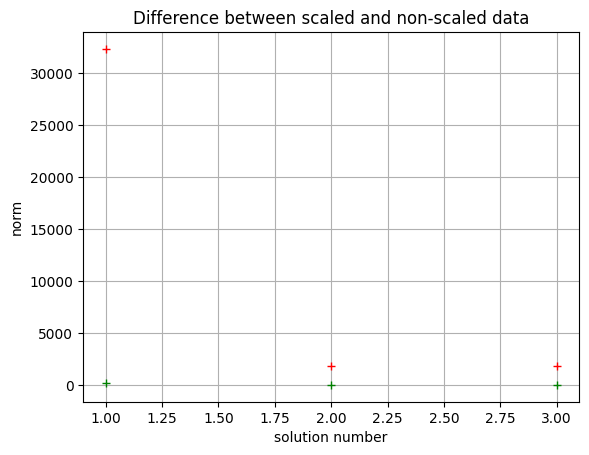

In [16]:
fig, ax = plt.subplots()

ax.plot(solution_number, get_solution_metrics_with_std_scaler(2), color='green', marker='+', linestyle='none')
ax.plot(solution_number, get_solution_metrics_without_std_scaler(2), color='red', marker='+', linestyle='none')

ax.set(xlabel='solution number', ylabel='norm',
       title='Difference between scaled and non-scaled data')
ax.grid()

plt.show()

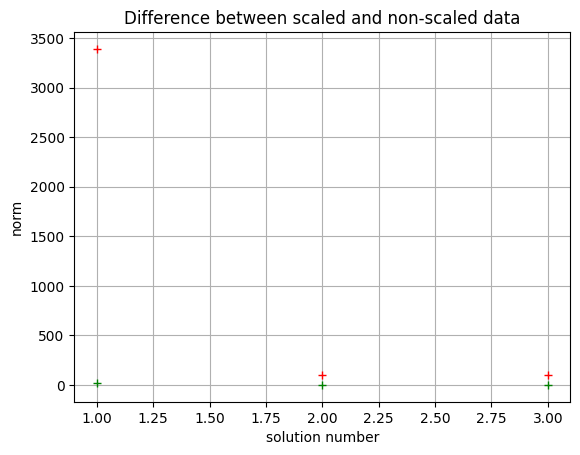

In [21]:
fig, ax = plt.subplots()

ax.plot(solution_number, get_solution_metrics_with_std_scaler(1), color='green', marker='+', linestyle='none')
ax.plot(solution_number, get_solution_metrics_without_std_scaler(1), color='red', marker='+', linestyle='none')

ax.set(xlabel='solution number', ylabel='norm',
       title='Difference between scaled and non-scaled data')
ax.grid()

plt.show()

Honestly I was sceptic about scalers till this moment. But the difference between the results is terrifying.

$L_2$ norm here is actually just strenghtening the difference betwe